In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import string

In [3]:
shark_tank = pd.read_csv('Shark Tank Companies (2).csv')

In [4]:
shark_tank.head()

,deal,description,episode,category,entrepreneurs,location,website,askedFor,exchangeForStake,valuation,season,shark1,shark2,shark3,shark4,shark5,title,episode-season,Multiple Entreprenuers
0,False,Bluetooth device implant for your ear.,1,Novelties,Darrin Johnson,"St. Paul, MN",NaN,1000000,15,6666667,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ionic Ear,1-1,False
1,True,Retail and wholesale pie factory with two reta...,1,Specialty Food,Tod Wilson,"Somerset, NJ",http://whybake.com/,460000,10,4600000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Mr. Tod's Pie Factory,1-1,False
2,True,Ava the Elephant is a godsend for frazzled par...,1,Baby and Child Care,Tiffany Krumins,"Atlanta, GA",http://www.avatheelephant.com/,50000,15,333333,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ava the Elephant,1-1,False
3,False,"Organizing, packing, and moving services deliv...",1,Consumer Services,"Nick Friedman, Omar Soliman","Tampa, FL",http://collegehunkshaulingjunk.com/,250000,25,1000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,College Foxes Packing Boxes,1-1,False
4,False,Interactive media centers for healthcare waiti...,1,Consumer Services,Kevin Flannery,"Cary, NC",http://www.wispots.com/,1200000,10,12000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Wispots,1-1,False


In [5]:
shark_tank['description'] = shark_tank['description'].str.replace('[^\w\s]', '')

In [6]:
shark_tank.description

0                  Bluetooth device implant for your ear
1      Retail and wholesale pie factory with two reta...
2      Ava the Elephant is a godsend for frazzled par...
3      Organizing packing and moving services deliver...
4      Interactive media centers for healthcare waiti...
                             ...                        
490    Zoom Interiors is a virtual service for interi...
491    Spikeball started out as a casual outdoors gam...
492    Shark Wheel is out to literally reinvent the w...
493    Adriana Montano wants to open the first Cat Ca...
494    Sway Motorsports makes a threewheeled allelect...
Name: description, Length: 495, dtype: object

In [7]:
shark_tank['description'] = shark_tank['description'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [8]:
shark_tank['deal'].value_counts()

True     251
False    244
Name: deal, dtype: int64

### 1. Pick out the Deal (Dependent Variable) and Description columns into a separate data frame.

In [9]:
shark_tank_new = shark_tank[['deal', 'description']]

In [10]:
shark_tank_new = shark_tank_new.sample(frac= 1, random_state= 2).reset_index().drop('index', axis=1)

In [11]:
shark_tank_new.head()

,deal,description
0,True,vice meets virtue with this new wine spritzer ...
1,True,breathometer makes breathalyzer tests accessib...
2,True,love the outdoors but bummed about the prospec...
3,False,a ticketless coat checking system for events
4,False,diamond dallas page puts the ddp in ddp yoga t...


In [12]:
shark_tank_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   deal         495 non-null    bool  
 1   description  495 non-null    object
dtypes: bool(1), object(1)
memory usage: 4.5+ KB


### 2. Create two corpora, one for those who secured a Deal, the other for those who did not secure a deal.

In [13]:
shark_tank_new['deal'] = shark_tank_new['deal'].astype('str')

In [14]:
shark_tank_new.dtypes

deal           object
description    object
dtype: object

In [15]:
shark_tank_group =shark_tank_new.groupby('deal')
shark_tank_group.head()

,deal,description
0,True,vice meets virtue with this new wine spritzer ...
1,True,breathometer makes breathalyzer tests accessib...
2,True,love the outdoors but bummed about the prospec...
3,False,a ticketless coat checking system for events
4,False,diamond dallas page puts the ddp in ddp yoga t...
5,True,the squatty potty is a toilet stool that helps...
6,False,the home t is a stylish way to show your state...
7,True,the natural grip makes the bestfitting hand gr...
8,False,the caddy girls offers a unique and fun way to...
9,False,move over dartboards ninja cards are here ninj...


In [16]:
deal_secured = pd.DataFrame()
deal_not_secured = pd.DataFrame()
deal_secured = shark_tank_group.get_group('True')
deal_not_secured = shark_tank_group.get_group('False')

In [17]:
deal_secured.head()

,deal,description
0,True,vice meets virtue with this new wine spritzer ...
1,True,breathometer makes breathalyzer tests accessib...
2,True,love the outdoors but bummed about the prospec...
5,True,the squatty potty is a toilet stool that helps...
7,True,the natural grip makes the bestfitting hand gr...


In [18]:
deal_not_secured.head()

,deal,description
3,False,a ticketless coat checking system for events
4,False,diamond dallas page puts the ddp in ddp yoga t...
6,False,the home t is a stylish way to show your state...
8,False,the caddy girls offers a unique and fun way to...
9,False,move over dartboards ninja cards are here ninj...


### 2.3 The following exercise is to be done for both the corpora:
### a) Find the number of characters for both the corpuses.

In [25]:
deal_secured['char'] = deal_secured['description'].str.len()
print('Number of characters(Deal Secured):', deal_secured['char'].sum())

Number of characters(Deal Secured): 62360


In [26]:
deal_not_secured['char'] = deal_not_secured['description'].str.len()
print('Number of characters(Deal not Secured):', deal_not_secured['char'].sum())

Number of characters(Deal not Secured): 45997


### b) Remove Stop Words from the corpora. (Words like ‘also’, ‘made’, ‘makes’, ‘like’, ‘this’, ‘even’ and ‘company’ are to be removed)

In [39]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
deal_secured['description'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
deal_not_secured['description'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

3                     ticketless coat check system event
4      diamond dalla page put ddp ddp yoga threetim w...
6      home stylish way show state pride help rais mo...
8      caddi girl offer uniqu fun way spend day link ...
9      move dartboard ninja card ninja card fun cardt...
                             ...                        
486    hear tightknit famili close guard secret mouth...
488    pure ayr odor elimin anyon own pet ever face l...
490    order uniqu chocol bar onlin custom last detai...
492             rubber band increas resist exercis activ
493       franchisemodel offer profession graffiti remov
Name: description, Length: 244, dtype: object

In [40]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
deal_secured['description'] = deal_secured['description'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
deal_secured['description'].head()

0    vice meets virtue new wine spritzer bon affair...
1    breathometer breathalyzer tests accessible con...
2    love outdoors bummed prospect storing enormous...
5    squatty potty toilet stool helps user mimic na...
7    natural grip bestfitting hand grips protecting...
Name: description, dtype: object

In [41]:
deal_not_secured['description'] = deal_not_secured['description'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
deal_not_secured['description'].head()

3               ticketless coat checking system events
4    diamond dallas page puts ddp ddp yoga threetim...
6    home stylish way show state pride helping rais...
8    caddy girls offers unique fun way spend day li...
9    move dartboards ninja cards ninja cards fun ca...
Name: description, dtype: object

In [42]:
freq_1 = pd.Series(' '.join(deal_secured['description']).split()).value_counts()[:10]
freq_1

make        25
products    19
designed    19
line        18
way         18
easy        18
without     18
use         17
kids        17
water       15
dtype: int64

In [49]:
freq_1 = ['also', 'made', 'make', 'like', 'this', 'even', 'company']

In [50]:
deal_secured['description'] = deal_secured['description'].apply(lambda x: " ".join(x for x in x.split() if x not in freq_1))
deal_secured['description'].head()

0    vice meets virtue new wine spritzer bon affair...
1    breathometer breathalyzer tests accessible con...
2    love outdoors bummed prospect storing enormous...
5    squatty potty toilet stool helps user mimic na...
7    natural grip bestfitting hand grips protecting...
Name: description, dtype: object

In [51]:
freq_2 = pd.Series(' '.join(deal_not_secured['description']).split()).value_counts()[:10]
freq_2

make        19
water       17
use         17
system      16
online      15
designed    15
product     15
without     14
bottle      14
one         13
dtype: int64

In [52]:
freq_2 = ['also', 'made', 'make', 'like', 'this', 'even', 'company']

In [53]:
deal_not_secured['description'] = deal_not_secured['description'].apply(lambda x: " ".join(x for x in x.split() if x not in freq_2))
deal_not_secured['description'].head()

3               ticketless coat checking system events
4    diamond dallas page puts ddp ddp yoga threetim...
6    home stylish way show state pride helping rais...
8    caddy girls offers unique fun way spend day li...
9    move dartboards ninja cards ninja cards fun ca...
Name: description, dtype: object

### c) What were the top 3 most frequently occurring words in both corpuses (after removing stop words)?

In [58]:
deal_secured_words=[x for x in pd.Series(' '.join(deal_secured['description']).split())]
nltk.FreqDist(deal_secured_words).most_common(3)

[('products', 19), ('designed', 19), ('without', 18)]

In [59]:
deal_not_secured_words=[x for x in pd.Series(' '.join(deal_not_secured['description']).split())]
nltk.FreqDist(deal_not_secured_words).most_common(3)

[('water', 17), ('use', 17), ('system', 16)]

### d) Plot the Word Cloud for both the corpora.

In [65]:
!pip install wordcloud

In [66]:
wc_deal_secured = ' '.join(deal_secured['description'])

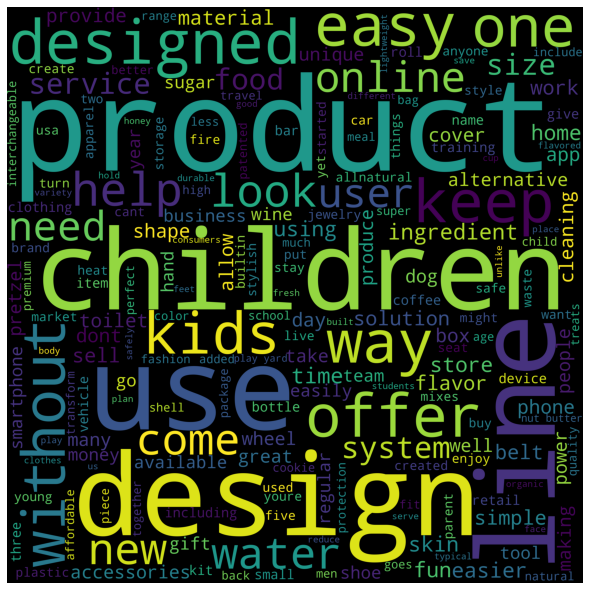

In [68]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc_deal_secured) 
                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

plt.show()


In [69]:
wc_deal_not_secured = ' '.join(deal_not_secured['description'])

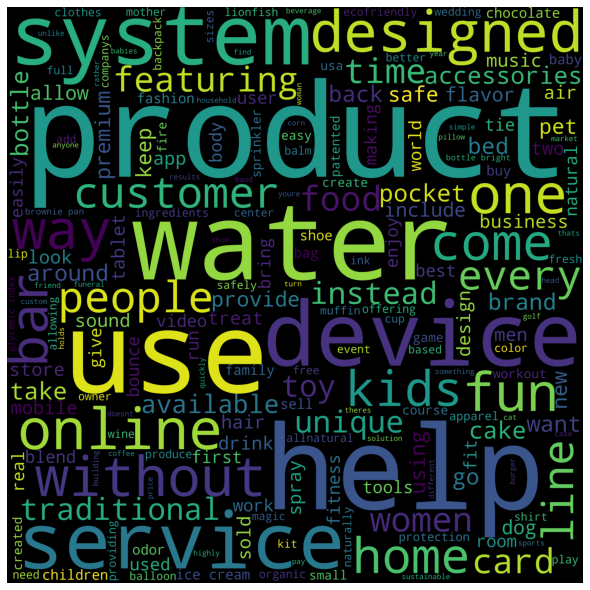

In [70]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc_deal_not_secured) 
                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

plt.show()